In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from desitarget.targetmask import desi_mask, bgs_mask
from collections import Counter

In [2]:
targets = Table.read('targets/cut_dark_north.fits')
tiles = Table.read('footprint/tiles_cut_dark_north.fits')

In [3]:
isELG = (targets['DESI_TARGET']&desi_mask['ELG'])!=0
print(np.count_nonzero(isELG), len(targets))
print(np.count_nonzero(targets['OBSCONDITIONS'][isELG]==3))
print(set(tiles['OBSCONDITIONS']))
gray_obsconditions = 2
dark_obsconditions = 1
dark_or_gray_obsconditions = gray_obsconditions | dark_obsconditions

2038825 3902588
2037983
{1, 2}


In [4]:
gray_obsconditions|dark_obsconditions

3

In [5]:
r = np.random.random(len(targets))
rr = r<0.30

In [6]:
to_gray = isELG & rr
to_dark = isELG & (~rr)
targets['OBSCONDITIONS'][to_gray] = gray_obsconditions
targets['OBSCONDITIONS'][to_dark] = dark_obsconditions

In [7]:
#targets.write('targets/cut_dark_north_elg_30_gray_70_dark.fits')

In [8]:
import scipy.spatial

In [9]:
theta = np.deg2rad(90.0-targets['DEC'])
phi = np.deg2rad(-targets['RA'])
position = np.zeros([len(targets), 3])

In [10]:
position[:,0] = np.cos(phi) * np.sin(theta)
position[:,1] = np.sin(phi) * np.sin(theta)
position[:,2] = np.cos(theta)


In [11]:
position[10,:]

array([-0.96659311,  0.19313524, -0.16851274])

In [12]:
kd = scipy.spatial.KDTree(position, leafsize=10)

In [13]:
fiber_separation = np.deg2rad(150.0/60.0/60.0)
ferrule_size = np.deg2rad(30.0/60.0/60.0)
print(fiber_separation, ferrule_size)

0.000727220521664304 0.0001454441043328608


In [14]:
neigh_fiber = kd.count_neighbors(kd, fiber_separation)

In [15]:
neigh_fiber

112044790

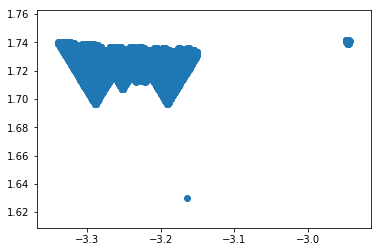

In [16]:
plt.scatter(phi[:20000], theta[:20000])